# JTNN quickstart

First, install the package if you haven't already. If you use conda:

In [1]:
! conda create -n jtnn_env --file conda_list.txt

'conda' is not recognized as an internal or external command,
operable program or batch file.


Then

In [2]:
! pip install -e .

Obtaining file:///C:/Users/cs843/Documents/PhD/JTNN-VAE
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for jtnn


In [1]:
import os
import pickle

# Disable CUDA (workaround for GPU memory leak issue)
os.environ["CUDA_VISIBLE_DEVICES"]=""

import tqdm
import pandas as pd

from IPython.display import display
from fast_jtnn.fp_calculator import FingerprintCalculator
from fast_jtnn.mol_tree import main_mol_tree
from fast_molvae.preprocess import create_tensor_pickle
from fast_molvae.vae_train import main_vae_train
from rdkit import Chem
from sklearn.cluster import KMeans

In [2]:
# Verify that rdkit version is 2020.09.3 as
# version 2021.03.1 does not seem to work
import rdkit
rdkit.__version__

'2022.09.4'

## Generate vocabulary

In [4]:
main_mol_tree('data/train.txt', 'data/vocab_full.txt')

26it [00:00, 68.41it/s][20:40:21] WARNING: not removing hydrogen atom without neighbors
34it [00:00, 64.00it/s][20:40:21] WARNING: not removing hydrogen atom without neighbors
54it [00:00, 80.33it/s][20:40:22] WARNING: not removing hydrogen atom without neighbors
65it [00:00, 88.24it/s][20:40:22] WARNING: not removing hydrogen atom without neighbors
110it [00:01, 76.74it/s][20:40:22] WARNING: not removing hydrogen atom without neighbors
120it [00:01, 82.81it/s][20:40:22] WARNING: not removing hydrogen atom without neighbors
131it [00:01, 86.13it/s][20:40:23] WARNING: not removing hydrogen atom without neighbors
214it [00:02, 102.19it/s][20:40:23] WARNING: not removing hydrogen atom without neighbors
400it [00:04, 103.27it/s][20:40:25] WARNING: not removing hydrogen atom without neighbors
446it [00:04, 101.70it/s][20:40:26] WARNING: not removing hydrogen atom without neighbors
[20:40:26] WARNING: not removing hydrogen atom without neighbors
521it [00:05, 114.42it/s][20:40:26] WARNING: n

## Tensorize training set molecules

In [7]:
create_tensor_pickle('data/train.txt', 'data/tensors.pickle')

Input File read


## Train VAE

In [9]:
model = main_vae_train('data/tensors.pickle', 'data/vocab_full.txt', 'data/models', num_workers=4)

JTNNVAE(
  (jtnn): JTNNEncoder(
    (embedding): Embedding(127, 450)
    (outputNN): Sequential(
      (0): Linear(in_features=900, out_features=450, bias=True)
      (1): ReLU()
    )
    (GRU): GraphGRU(
      (W_z): Linear(in_features=900, out_features=450, bias=True)
      (W_r): Linear(in_features=450, out_features=450, bias=False)
      (U_r): Linear(in_features=450, out_features=450, bias=True)
      (W_h): Linear(in_features=900, out_features=450, bias=True)
    )
  )
  (decoder): JTNNDecoder(
    (embedding): Embedding(127, 450)
    (W_z): Linear(in_features=900, out_features=450, bias=True)
    (U_r): Linear(in_features=450, out_features=450, bias=False)
    (W_r): Linear(in_features=450, out_features=450, bias=True)
    (W_h): Linear(in_features=900, out_features=450, bias=True)
    (W): Linear(in_features=478, out_features=450, bias=True)
    (U): Linear(in_features=478, out_features=450, bias=True)
    (U_i): Linear(in_features=900, out_features=450, bias=True)
    (W_o): 

## Check that it works

In [10]:
smiles_list = open("data/train.txt", "r").read().split()[:5000]

In [12]:
fp_calculator = FingerprintCalculator("data/models/model.completed", "data/vocab_full.txt")

In [13]:
smiles_list

['C=CCC1(CC(C)O)C(=O)NC(=O)NC1=O',
 'CCn1nc(C)c2c1C(c1ccccc1)=NCC(=O)N2',
 'O=C1C(O)N=C(c2ccccc2F)c2cc(Cl)ccc2N1CCO',
 'CCN(CC)C(=S)SSC(=S)N(CC)CC',
 'Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2.O=C(O)/C=C\\C(=O)O',
 'C=CCN1C(=O)C(CC(C)C)NC1=S',
 'CC1=CC(=O)N2CC(=O)N(C)c3ccc(Cl)cc3C2(c2ccccc2)O1',
 'CCC12CCN(CC3CCC3)C(Cc3ccc(O)cc31)C2(C)C',
 'ON1CC(=NCC2CC2)N=c2ccc(Cl)cc2=C1c1ccccc1',
 'CCOC(N)=O',
 'C#CCN(C)Cc1ccccc1',
 'CCC[C@@H]1O[C@@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)CC[C@]5(C)[C@@]4(F)[C@@H](O)C[C@]3(C)[C@]2(C(=O)CO)O1',
 'CN(C)CCOC1(Cc2ccccc2)CC2CCC1(C)C2(C)C',
 'NC(N)=NC(=O)c1nc(Cl)c(N)nc1N',
 'CC(C)NNC(=O)COc1ccc(Cl)cc1',
 'OCCN1CCN(CCCC2c3ccc(F)cc3Sc3ccc(C(F)(F)F)cc32)CC1',
 'Clc1ccccc1C1=NCc2nnc(C3CCCCC3)n2-c2sc(Br)cc21',
 'C=C',
 'CO[C@]12CC[C@@]3(C[C@@H]1C(C)(C)O)[C@H]1Cc4ccc(O)c5c4[C@@]3(CCN1CC1CC1)[C@H]2O5',
 'CC(=O)NCCCN1CCN(c2cc(Cl)ccc2Cl)CC1',
 'CN1C(=O)CN(C(N)=O)C(c2ccccc2)c2cc(Cl)ccc21',
 'CCC[C@@H]1O[C@@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)C=C[C@]5(C)C4(F)[C@@H](O)C[C@]3(C

In [14]:
%pdb on

Automatic pdb calling has been turned ON


In [15]:
fps = fp_calculator(smiles_list)

100%|██████████| 3/3 [00:39<00:00, 13.26s/it]


In [16]:
kmeans = KMeans(n_clusters=500, random_state=0).fit(fps)
labels = kmeans.labels_

In [17]:
db = pd.DataFrame()

In [18]:
db['smiles']=smiles_list
db['label']=labels

In [21]:
db

,smiles,label
0,C=CCC1(CC(C)O)C(=O)NC(=O)NC1=O,339
1,CCn1nc(C)c2c1C(c1ccccc1)=NCC(=O)N2,216
2,O=C1C(O)N=C(c2ccccc2F)c2cc(Cl)ccc2N1CCO,220
3,CCN(CC)C(=S)SSC(=S)N(CC)CC,249
4,Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2.O=C(O)/...,352
...,...,...
546,CN(C)CCCN1c2ccccc2Sc2cccnc21,263
547,CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC,127
548,CN1CCN(C2=Nc3cc(F)ccc3Cc3ccccc32)CC1,346
549,CCCCCCCCCC(=O)OC1(c2ccc(Cl)cc2)CCN(CCCC(=O)c2c...,449


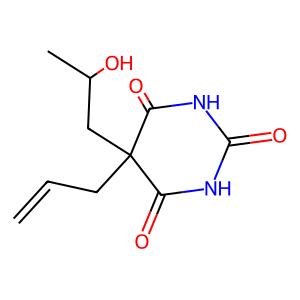

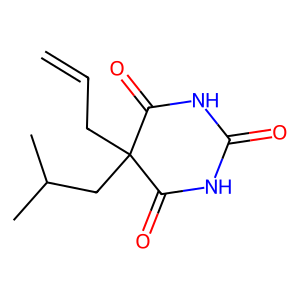

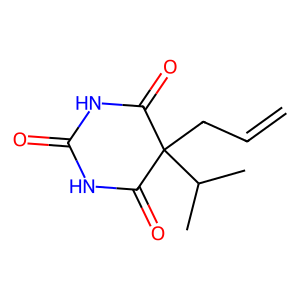

In [23]:
for smiles in db[db['label']==339]['smiles'].values:
    display(Chem.Draw.MolToImage(Chem.MolFromSmiles(smiles)))